In [ ]:
from IPython.display import display
import pandas as pd
data = pd.read_csv('/data/data_pre_BTL.csv')
display(data.head(5))

,datetime,temp,dewpoint,maxtemp,mintemp,precipitation,humidity,windspeed,winddeg
0,1/1/2023,14.16,9.77,19.33,9.40,0.010,76.24,1.82,24.4
1,1/2/2023,14.27,11.14,18.47,9.99,0.730,82.32,2.55,44.3
2,1/3/2023,14.76,9.85,18.88,10.95,0.130,73.39,2.07,27.7
3,1/4/2023,15.89,12.86,20.89,12.52,0.625,83.76,1.77,118.7
4,1/5/2023,17.14,14.35,21.10,13.35,0.625,84.15,2.28,42.7


In [ ]:
df_normal = pd.read_csv('/data/datanormal_mintemp_BTL.csv')
display(df_normal)

,mintemp,temp,dewpoint,maxtemp
0,0.244596,0.276152,0.299203,0.280184
1,0.268215,0.280561,0.353785,0.251969
2,0.306645,0.300200,0.302390,0.265420
3,0.369496,0.345491,0.422311,0.331365
4,0.402722,0.395591,0.481673,0.338255
...,...,...,...,...
887,0.911529,0.874549,0.966135,0.756562
888,0.941553,0.890581,0.987251,0.761155
889,0.951161,0.881764,0.994422,0.722441
890,0.902722,0.824449,0.948207,0.604003


In [4]:
df_normal[:10]

,mintemp,temp,dewpoint,maxtemp
0,0.244596,0.276152,0.299203,0.280184
1,0.268215,0.280561,0.353785,0.251969
2,0.306645,0.300200,0.302390,0.265420
3,0.369496,0.345491,0.422311,0.331365
4,0.402722,0.395591,0.481673,0.338255
5,0.231785,0.316633,0.325498,0.375328
6,0.339872,0.377555,0.311952,0.354331
7,0.421137,0.403206,0.462550,0.382874
8,0.486389,0.455311,0.527490,0.390092
9,0.479984,0.413226,0.554980,0.304790


In [5]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Chọn đặc trưng và biến mục tiêu
features = ['mintemp','temp','dewpoint','maxtemp']

data_features = df_normal[features].values

# Chọn window
window_size = 7
X_train, y_train = [], []

for i in range(len(data_features) - window_size):
    X_train.append(data_features[i:i + window_size])
    y_train.append(data_features[i + window_size])

X_train = np.array(X_train)
y_train = np.array(y_train)

# Phân chia dữ liệu thành 2 tập train và test
split_index = int(0.8 * len(X_train))

X_train, X_test = X_train[:split_index], X_train[split_index:]
y_train, y_test = y_train[:split_index], y_train[split_index:]

# Reshape dữ liệu cho mô hình LSTM
X_train = X_train.reshape((X_train.shape[0], window_size, X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], window_size, X_test.shape[2]))

In [6]:
X_train[:5]

array([[[0.24459568, 0.2761523 , 0.29920319, 0.28018373],
        [0.26821457, 0.28056112, 0.35378486, 0.2519685 ],
        [0.30664532, 0.3002004 , 0.30239044, 0.26541995],
        [0.3694956 , 0.34549098, 0.42231076, 0.33136483],
        [0.40272218, 0.39559118, 0.48167331, 0.33825459],
        [0.23178543, 0.31663327, 0.32549801, 0.37532808],
        [0.3398719 , 0.37755511, 0.31195219, 0.35433071]],

       [[0.26821457, 0.28056112, 0.35378486, 0.2519685 ],
        [0.30664532, 0.3002004 , 0.30239044, 0.26541995],
        [0.3694956 , 0.34549098, 0.42231076, 0.33136483],
        [0.40272218, 0.39559118, 0.48167331, 0.33825459],
        [0.23178543, 0.31663327, 0.32549801, 0.37532808],
        [0.3398719 , 0.37755511, 0.31195219, 0.35433071],
        [0.42113691, 0.40320641, 0.4625498 , 0.38287402]],

       [[0.30664532, 0.3002004 , 0.30239044, 0.26541995],
        [0.3694956 , 0.34549098, 0.42231076, 0.33136483],
        [0.40272218, 0.39559118, 0.48167331, 0.33825459],
        [0

In [7]:
y_train[:5]

array([[0.42113691, 0.40320641, 0.4625498 , 0.38287402],
       [0.48638911, 0.45531062, 0.52749004, 0.39009186],
       [0.47998399, 0.41322645, 0.55498008, 0.30479003],
       [0.50280224, 0.45531062, 0.5752988 , 0.41830709],
       [0.48278623, 0.51022044, 0.6374502 , 0.50262467]])

In [8]:
# Xây dựng mô hình LSTM
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(64))
model.add(Dense(24))
model.add(Dense(len(features)))
model.compile(optimizer='adam', loss='mse')

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 7, 128)         │        68,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 24)             │         1,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           100 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 119,164 (465.48 KB)

 Trainable params: 119,164 (465.48 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Huấn luyện mô hình
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.1722
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0199
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0162
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0143
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0147
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0133
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0127
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0134
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0123
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0126
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0122
Epoch 12/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0110
Epoch 13/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0114
Epoch 14/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0098
Epoch 15/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - lo

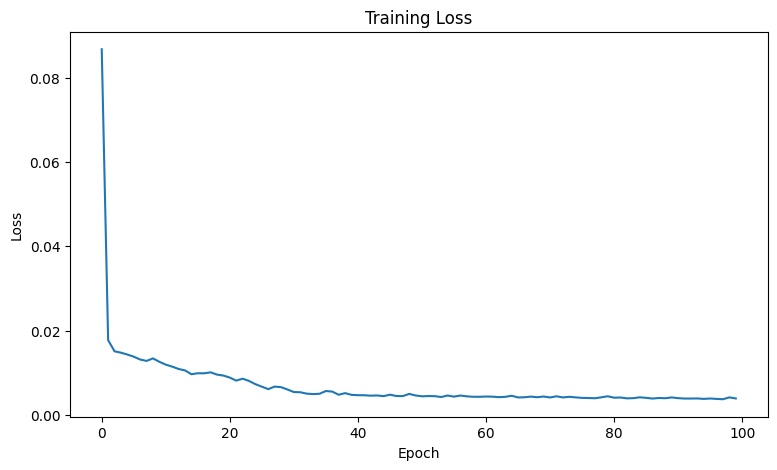

In [10]:
# Vẽ biểu đồ
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 5))
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá mô hình
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step
Mean Absolute Error (MAE): 0.053433540873807875
Mean Squared Error (MSE): 0.0051223835872996615
R2 Score: 0.8944052400961984


In [ ]:
results_text = f"Mean Absolute Error (MAE): {mae}\n" \
               f"Mean Squared Error (MSE): {mse}\n" \
               f"R2 Score: {r2}\n"

with open("/data/lstm/result_mintemp_V.txt", "w") as file:
    file.write(results_text)

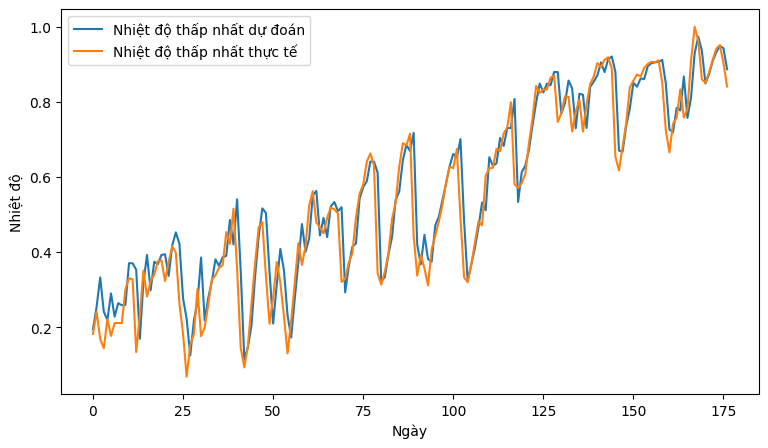

In [13]:
# Vẽ biểu đồ
plt.figure(figsize=(9, 5))
plt.plot(y_pred[:,0], label='Nhiệt độ thấp nhất dự đoán')
plt.plot(y_test[:,0], label='Nhiệt độ thấp nhất thực tế')
plt.xlabel('Ngày')
plt.ylabel('Nhiệt độ')
plt.legend()
plt.show()

In [14]:
# Dữ liệu dự đoán
import sklearn
convert = sklearn.preprocessing.MinMaxScaler()
data_maxtemp = data['mintemp'].values.reshape(-1,1)
convert.fit_transform(data_maxtemp)

# Chuyển đổi dữ liệu
y_pred_original = convert.inverse_transform(y_pred)

print("Dữ liệu dự đoán gốc")
y_pred_original[:10]

Dữ liệu dự đoán gốc


array([[ 8.1477165,  7.740748 ,  8.942482 ,  7.2771287],
       [ 9.639551 ,  9.916138 , 10.491946 ,  9.704288 ],
       [11.601807 , 12.163617 , 12.8064575, 12.015642 ],
       [ 9.326017 , 10.06679  , 10.099041 , 10.1205845],
       [ 8.773712 ,  9.550737 ,  9.5421505,  9.743779 ],
       [10.541149 , 11.047333 , 11.767429 , 11.095416 ],
       [ 8.99252  ,  9.451873 , 10.056828 ,  9.693135 ],
       [ 9.889918 , 10.333153 , 11.157337 , 10.62516  ],
       [ 9.756162 , 10.230826 , 11.050005 , 10.578704 ],
       [ 9.777272 , 10.174751 , 11.046696 , 10.429337 ]], dtype=float32)

In [15]:
# Chuyển đổi dữ liệu
y_original = convert.inverse_transform(y_test)
print("Dữ liệu thực tế gốc")
y_original[:10]

Dữ liệu thực tế gốc


array([[ 7.84      ,  9.77779158,  6.99221514, 10.1168832 ],
       [ 9.33      , 11.4898477 , 11.73941036, 11.99366142],
       [ 7.52      , 10.96922244, 10.53519522, 12.19035433],
       [ 6.89      ,  9.88792385,  8.84332271, 10.85448163],
       [ 8.83      ,  9.45740681, 10.2167251 , 10.44470472],
       [ 7.71      ,  9.78780361,  9.86839841, 10.96102362],
       [ 8.57      , 10.55872946,  9.27126693, 10.41192257],
       [ 8.57      , 10.1582485 ,  9.76887649, 10.79711286],
       [ 8.56      , 10.46862124,  9.49021514, 10.3955315 ],
       [10.81      , 11.7001002 , 12.81424701, 12.42802493]])

In [ ]:
df = pd.DataFrame({
    'PreMintemp': y_pred_original[:,0].flatten(),
    'ActMinTemp': y_original[:,0].flatten()
})

# Lưu DataFrame vào tệp
df.to_csv('/data/lstm/chart_min_V.csv', index=False)

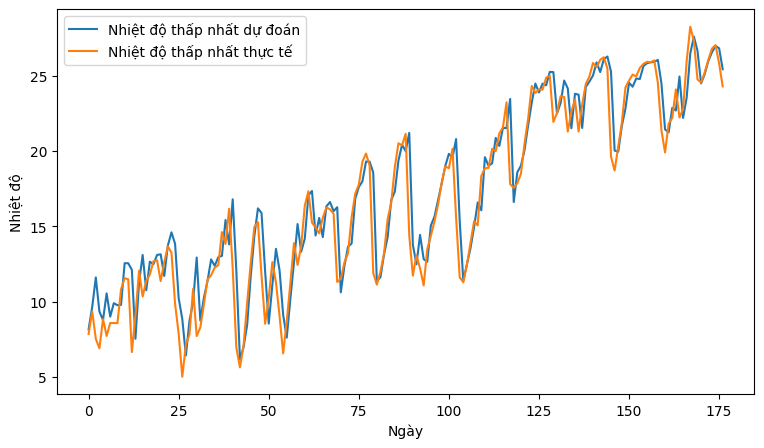

In [17]:
plt.figure(figsize=(9, 5))
plt.plot(y_pred_original[:,0], label='Nhiệt độ thấp nhất dự đoán')
plt.plot(y_original[:,0], label='Nhiệt độ thấp nhất thực tế')
plt.xlabel('Ngày')
plt.ylabel('Nhiệt độ')
plt.legend()
plt.show()